The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
Text: The content of the blog post. Column name: Data
Category: The category to which the blog post belongs. Column name: Labels
Tasks
1. Data Exploration and Preprocessing
Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.
2. Naive Bayes Model for Text Classification
Split the data into training and test sets.
Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
Train the model on the training set and make predictions on the test set.
3. Sentiment Analysis
Choose a suitable library or method for performing sentiment analysis on the blog post texts.
Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
Examine the distribution of sentiments across different categories and summarize your findings.
4. Evaluation
Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
Discuss the performance of the model and any challenges encountered during the classification process.
Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [1]:
import pandas as pd
import numpy as np 

In [29]:
blog_data=pd.read_csv("blogs_categories.csv",index_col=0)
blog_data.head()

,Data,Labels
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


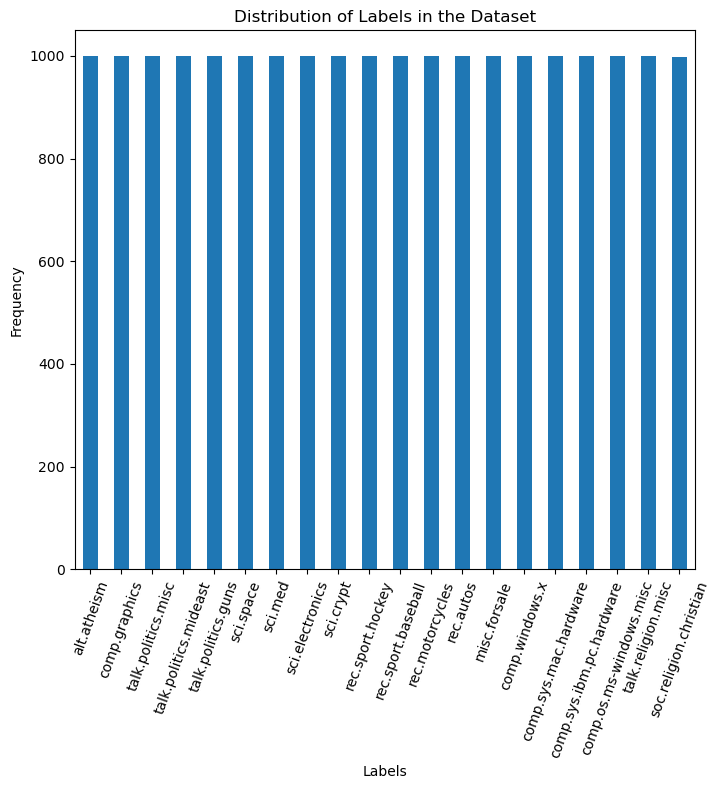

In [16]:
# Plot the histogram of Labels columns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,7))
blog_data["Labels"].value_counts().plot(kind="bar")
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

# Test Preprocessing 

In [30]:
# convert the test into lowercase and remove punctuation 

In [19]:
import string

In [5]:
def text_preprocess(text):
    # convert into lowercase()
    text=text.lower()
    # remove punctuation 
    text=text.translate(str.maketrans('','',string.punctuation))
    return text
    
blog_data["Processed_text"]=blog_data["Data"].apply(text_preprocess)
print(blog_data.head())

                                                Data       Labels  \
0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism   
1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   

                                      Processed_text  
0  xref cantaloupesrvcscmuedu altatheism49960 alt...  
1  xref cantaloupesrvcscmuedu altatheism51060 alt...  
2  newsgroups altatheism\npath cantaloupesrvcscmu...  
3  xref cantaloupesrvcscmuedu altatheism51120 alt...  
4  xref cantaloupesrvcscmuedu altatheism51121 soc...  


In [6]:
# feature Extraction using Countvectorizer 
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer=CountVectorizer(max_features=5000)
features=Vectorizer.fit_transform(blog_data["Processed_text"])
target=blog_data["Labels"]

In [7]:
# Spilt the training & testing text data 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [8]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13997, 5000)
(6000, 5000)
(13997,)
(6000,)


In [9]:
# Apply the naive_bayes model
nb_classifier= MultinomialNB()

# train the model 
nb_classifier.fit(x_train,y_train)

# predict the model 
y_pred_nb=nb_classifier.predict(x_test)

In [10]:
# Sentiment Analysis 
# install the package 
! pip install textblob

In [11]:
from textblob import TextBlob 
def text_sentiment(text):
        analysis=TextBlob(text)
        if analysis.sentiment.polarity > 0 :
            return 'Positive'
        elif analysis.sentiment.polarity == 0 :
            return 'Neutral'
        else :
            return 'Negative'
blog_data["Sentiment"]=blog_data['Data'].apply(text_sentiment)
blog_data

,Data,Labels,Processed_text,Sentiment
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,xref cantaloupesrvcscmuedu altatheism49960 alt...,Positive
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51060 alt...,Positive
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,Positive
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51120 alt...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51121 soc...,Negative
...,...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54482 tal...,Positive
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54485 tal...,Positive
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,Positive
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,Positive


In [12]:
accuracy=accuracy_score(y_test,y_pred_nb)
precision=precision_score(y_test,y_pred_nb,average="weighted")
recall=recall_score(y_test,y_pred_nb,average="weighted")
f1=f1_score(y_test,y_pred_nb,average="weighted")

print(f'Accuracy :{accuracy}')
print(f'Precison :{precision}')
print(f'Recall :{recall}')
print(f'f1 :{f1}')

Accuracy :0.8588333333333333
Precison :0.8606009991625512
Recall :0.8588333333333333
f1 :0.8574470549401357


In [13]:
# Print classification report 
print(classification_report(y_test,y_pred_nb))

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.85      0.80       326
           comp.graphics       0.83      0.84      0.83       292
 comp.os.ms-windows.misc       0.85      0.86      0.85       332
comp.sys.ibm.pc.hardware       0.84      0.83      0.84       301
   comp.sys.mac.hardware       0.85      0.91      0.88       279
          comp.windows.x       0.94      0.87      0.91       295
            misc.forsale       0.74      0.90      0.81       307
               rec.autos       0.88      0.91      0.90       302
         rec.motorcycles       0.89      0.95      0.92       313
      rec.sport.baseball       0.97      0.94      0.95       310
        rec.sport.hockey       0.98      0.95      0.97       294
               sci.crypt       0.96      0.90      0.93       304
         sci.electronics       0.86      0.88      0.87       294
                 sci.med       0.95      0.90      0.92       289
         

In [14]:
# print sentiment distribution 
Sentiment_distribution=blog_data["Sentiment"].value_counts()
print(f'Sentiment distribution of data:-{Sentiment_distribution}')

Sentiment distribution of data:-Sentiment
Positive    15282
Negative     4709
Neutral         6
Name: count, dtype: int64


# Data Visualization

In [15]:
# Sentiment distribution across categories 

In [16]:
# Plot the sentiment distribution 
import matplotlib.pyplot as plt 
import seaborn as sns 

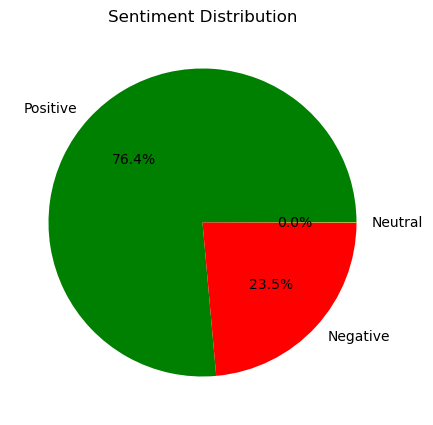

In [17]:
plt.figure(figsize=(6,5))
plt.pie(x=Sentiment_distribution,labels=Sentiment_distribution.index, autopct='%1.1f%%', colors=["Green","Red","Yellow"])
plt.title(f'Sentiment Distribution')
plt.show()